# Used Cars Analysis

In [1]:
import pandas as pd

df = pd.read_csv("data/cars.csv")

## Data Overview

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6019 non-null   object 
 9   Engine             5984 non-null   object 
 10  Power              5984 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.279572,9.492708
std,1737.679967,3.269742,9.126884e+04,0.805960,11.242783
min,0.000000,1998.000000,1.710000e+02,2.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


## Data cleaning and Feature Enginnering

### Dropping redundant column
The code removes the `Unnamed: 0` column and then displays the first five rows of the cleaned DataFrame.

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Handling Missing Values

The code replaces empty strings (`""`) with `NaN` values in the DataFrame `df` using `df.replace()`. The `inplace=True` argument modifies the DataFrame directly.

In [4]:
import numpy as np

df.replace("", np.nan, inplace=True)

### Set Unique ID to every row

In [5]:
import string
import random

def generate_unique_id():
    return ''.join(random.choices(string.ascii_uppercase + string.digits, k=4))

# Create the 'unique_id' column with 4-character IDs
df['Car_ID'] = [generate_unique_id() for _ in range(len(df))]

### Car Names

#### Extracting Brand Names

The code defines a function `extract_brand()` to identify multi-word brands or return the first word of the car name. It then creates a `Brand` column by applying this function to the `Name` column, which is converted to title case.

In [6]:
multi_word_brands = ['Land Rover', 'Mercedes Benz']

def extract_brand(name):
    for brand in multi_word_brands:
        if name.startswith(brand):
            return brand
    # If no match, return the first word
    return name.split()[0]

df['Name'] = df['Name'].str.title() # First word is capital
df['Brand'] = df['Name'].apply(extract_brand)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_ID,Brand
0,Maruti Wagon R Lxi Cng,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,4UPC,Maruti
1,Hyundai Creta 1.6 Crdi Sx Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,I0QU,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,PGOP,Honda
3,Maruti Ertiga Vdi,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,XTNK,Maruti
4,Audi A4 New 2.0 Tdi Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,5XF2,Audi


### Car Year

#### Calculating Car Age

The code calculates the age of each car by subtracting its manufacturing year (`df['Year']`) from the current year using `datetime.now().year`. The result is stored in a new column `Car_Age`.

In [7]:
from datetime import datetime

df['Car_Age'] = datetime.now().year - df['Year']

### Calculate Price Per Kilometer

In [8]:
# Calculate Price_Per_Km in lakhs (since Price is in lakhs)
df['Price_Per_Km'] = df['Price'] / df['Kilometers_Driven']

# Round to 7 decimal places
df['Price_Per_Km'] = df['Price_Per_Km'].round(7)

### Mileage

#### Converting Mileage to kmpl

The `convert_to_kmpl()` function converts 'km/kg' to 'kmpl' by multiplying by 1.333, and keeps 'kmpl' values as is. It is applied to the `Mileage` column to create `Mileage_In_Kmpl`.

In [9]:
# Function to split Mileage into two separate columns
def split_mileage(row):
    if 'km/kg' in row:
        return float(row.split()[0]), None  # km/kg value, no kmpl
    elif 'kmpl' in row:
        return None, float(row.split()[0])  # no km/kg, kmpl value
    else:
        return None, None  # Unknown case

# Apply the function to split the column
df[['Mileage_kmkg', 'Mileage_kmpl']] = df['Mileage'].apply(
    lambda row: pd.Series(split_mileage(row))
)

In [10]:
def get_avg_mileage(fuel_type, car_age, transmission, mileage_col):
    # Filter the DataFrame based on the provided conditions
    filtered_data = df[(df['Fuel_Type'] == fuel_type) & 
                        df['Car_Age'] == car_age &
                       (df['Transmission'] == transmission)]
    
    # If the filtered data is not empty, calculate the mean of the mileage column
    if not filtered_data.empty:
        return filtered_data[mileage_col].mean()
    else:
        return np.nan  # Return NaN if no matching rows

In [11]:
# Function to replace zero mileage in kmpl or km/kg columns
def replace_zero_mileage(row):
    if pd.notnull(row['Mileage_kmpl']) and row['Mileage_kmpl'] == 0.0:
        # Replace 0.0 in Mileage_kmpl with average mileage for similar cars
        avg_mileage = get_avg_mileage(row['Fuel_Type'], row['Car_Age'], row['Transmission'], 'Mileage_kmpl')
        return avg_mileage if not np.isnan(avg_mileage) else row['Mileage_kmpl']
    elif pd.notnull(row['Mileage_kmkg']) and row['Mileage_kmkg'] == 0.0:
        # Replace 0.0 in Mileage_kmkg with average mileage for similar cars
        avg_mileage = get_avg_mileage(row['Fuel_Type'], row['Car_Age'], row['Transmission'], 'Mileage_kmkg')
        return avg_mileage if not np.isnan(avg_mileage) else row['Mileage_kmkg']
    else:
        # If no replacement is needed, return the original value
        return row['Mileage_kmpl'] if pd.notnull(row['Mileage_kmpl']) else row['Mileage_kmkg']

# Replace values in Mileage_kmpl
df['Mileage_kmpl'] = df.apply(
    lambda row: replace_zero_mileage(row) if pd.notnull(row['Mileage_kmpl']) and row['Mileage_kmpl'] == 0.0 else row['Mileage_kmpl'], axis=1
)

# Replace values in Mileage_kmkg
df['Mileage_kmkg'] = df.apply(
    lambda row: replace_zero_mileage(row) if pd.notnull(row['Mileage_kmkg']) and row['Mileage_kmkg'] == 0.0 else row['Mileage_kmkg'], axis=1
)


#### Calculating Average Mileage

The `get_avg_mileage()` function filters the DataFrame by fuel type, car age, and transmission, and returns the average mileage if matching data exists. If no match is found, it returns `NaN`. Example inputs are used to demonstrate its functionality.

In [12]:
# def get_avg_mileage(fuel_type, car_age, transmission):
#     filtered_data = df[(df['Fuel_Type'] == fuel_type) & 
#                        (df['Car_Age'] == car_age) & 
#                        (df['Transmission'] == transmission)]
    
#     if not filtered_data.empty:
#         avg_mileage = filtered_data['Mileage_In_Kmpl'].mean()
#         return avg_mileage
#     else:
#         return np.nan

#### Replacing Zero Mileage with Average Values

The `replace_zero_mileage()` function replaces 0.0 values in `Mileage_In_Kmpl` with the average mileage for the specific fuel type, car age, and transmission, using `get_avg_mileage()`. If no valid average is found, it keeps the value as 0. The function is applied to the column with `df.apply()`.

In [13]:
# def replace_zero_mileage(row):
#     if row['Mileage_In_Kmpl'] == 0.0:
#         avg_mileage = get_avg_mileage(row['Fuel_Type'], row['Car_Age'], row['Transmission'])
        
#         # If avg_mileage is NaN, return the original value (0)
#         return avg_mileage if not np.isnan(avg_mileage) else 0
#     else:
#         return row['Mileage_In_Kmpl']

# df['Mileage_In_Kmpl'] = df.apply(replace_zero_mileage, axis=1)

### Calculate Fuel Efficiency based on mileage

In [14]:
def categorize_efficiency(row):
    if pd.notna(row['Mileage_kmpl']):  # Check if petrol/diesel mileage exists
        if row['Mileage_kmpl'] > 15:
            return 'high'
        elif 10 <= row['Mileage_kmpl'] <= 15:
            return 'medium'
        else:
            return 'low'
    elif pd.notna(row['Mileage_kmkg']):  # Check if CNG mileage exists
        if row['Mileage_kmkg'] > 25:
            return 'high'
        elif 15 <= row['Mileage_kmkg'] <= 25:
            return 'medium'
        else:
            return 'low'
    else:
        return 'unknown'  # In case neither mileage is available

# Apply the categorization function to create the 'Fuel_Efficiency' column
df['Fuel_Efficiency'] = df.apply(categorize_efficiency, axis=1)

### Engine

#### Extracting Engine Capacity

The code extracts the numeric part of the `Engine` column before ' CC' using `str.extract()`, and converts any invalid values to `NaN` with `pd.to_numeric()` and `errors='coerce'`, ensuring only valid engine capacities are stored in the new `Engine_In_CC` column.

In [15]:
df['Engine_In_CC'] = df['Engine'].str.extract('(\d+)', expand=False)

df['Engine_In_CC'] = pd.to_numeric(df['Engine_In_CC'], errors='coerce')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lakshay\AppData\Local\Temp\ipykernel_8852\4224161519.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Engine_In_CC'] = df['Engine'].str.extract('(\d+)', expand=False)


#### Getting Average Engine CC Based on Fuel and Car Type

The `get_engine_cc()` function filters the DataFrame by `fuel_type` and `car_type` (owner type), and returns the mean engine capacity (`Engine_In_CC`) for matching rows. If no match is found, it returns `NaN`.

In [16]:
def get_engine_cc(fuel_type, car_type):
    filtered_data = df[(df['Fuel_Type'] == fuel_type) & (df['Owner_Type'] == car_type)]
    
    if not filtered_data.empty:
        return filtered_data['Engine_In_CC'].mean()  # Calculate and return the mean
    else:
        return np.nan

#### Replacing Null Engine Capacities

The `replace_null_engine()` function checks for `NaN` values in `Engine_In_CC`. If found, it replaces them with the average engine capacity from `get_engine_cc()` for the corresponding `Fuel_Type` and `Owner_Type`, appending "CC". If the value is already present, it remains unchanged.

In [17]:
def replace_null_engine(row):
    if pd.isna(row['Engine_In_CC']):
        return get_engine_cc(row['Fuel_Type'], row['Owner_Type'])
    else:
        return row['Engine_In_CC']

df['Engine_In_CC'] = df.apply(replace_null_engine, axis=1)

### Categorise car type

In [18]:
def get_car_type(engine_cc):
    try:
        if engine_cc <= 1200:
            return "Hatchback"
        elif engine_cc > 1200 and engine_cc <= 1600:
            return "Sedan"
        elif engine_cc > 1600 and engine_cc <= 2500:
            return "SUV"
        elif engine_cc > 2500 and engine_cc <= 3500:
            return "Luxury Car"
        elif engine_cc > 3500 and engine_cc <= 5000:
            return "Sports Car"
        elif engine_cc > 5000:
            return "Supercar"
        else:
            return "Unknown"
    except:
        return "Unknown"


# Assuming df has a column 'Engine_In_CC' for engine capacity in CC
df['Car_Type'] = df['Engine_In_CC'].apply(get_car_type)

### Power (In BHP)

#### Calculating Average Power by Fuel Type

The `calculate_avg_power(fuel_type)` function computes the average power (`Power_In_BHP`) for a specific fuel type. It filters the DataFrame to include only the rows with the specified `fuel_type` and calculates the mean of the `Power_In_BHP` values for that subset, returning the average power.

In [19]:
def calculate_avg_power(fuel_type):
    return df[df['Fuel_Type'] == fuel_type]['Power_In_BHP'].mean()

#### Extracting Power Values in BHP
To create a new column that extracts only the numerical part of the Power column (which contains values like 58.16 bhp, 21 bhp), we can use regular expressions to isolate the numeric values before the bhp string. Here's how you can do it:

In [20]:
df['Power_In_BHP'] = df['Power'].str.extract('(\d+\.?\d*)', expand=False).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lakshay\AppData\Local\Temp\ipykernel_8852\1550319751.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Power_In_BHP'] = df['Power'].str.extract('(\d+\.?\d*)', expand=False).astype(float)


#### Replacing NaN Power Values with Average Power

This code replaces `NaN` values in the `Power_In_BHP` column by applying the `calculate_avg_power()` function based on the car's fuel type. If the value is `NaN`, it replaces it with the average power for that fuel type.

In [21]:
df['Power_In_BHP'] = df.apply(
    lambda row: calculate_avg_power(row['Fuel_Type']) if pd.isna(row['Power_In_BHP']) else row['Power_In_BHP'],
    axis=1
)

### Car Seats

#### Handling Missing Seat Values

The code calculates the average number of seats for each brand and fills missing values in the `Seats` column based on the brand's average. It then rounds the values down using `np.floor()` and converts them to integers with `astype(int)`.

In [22]:
avg_seats_by_brand = df.groupby('Brand')['Seats'].mean()

df['Seats'] = df['Seats'].fillna(df['Brand'].map(avg_seats_by_brand))

df['Seats'] = np.floor(df['Seats']).astype(int)

## EDA

In [23]:
df.drop(['Mileage','Engine','Power'], axis=1, inplace=True)

In [24]:
df.to_csv('data/cleaned_dataset_cars.csv', index=False)
# df.to_excel('cars.xlsx', index=False)

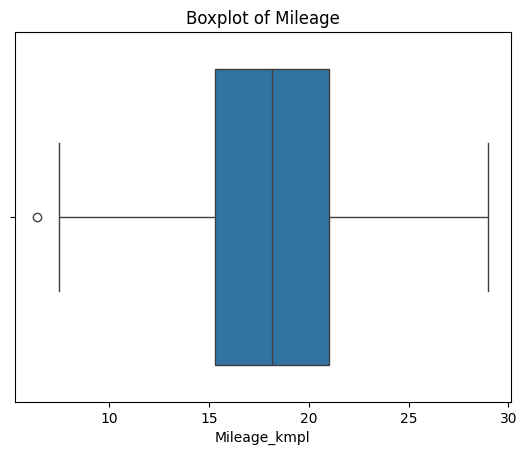

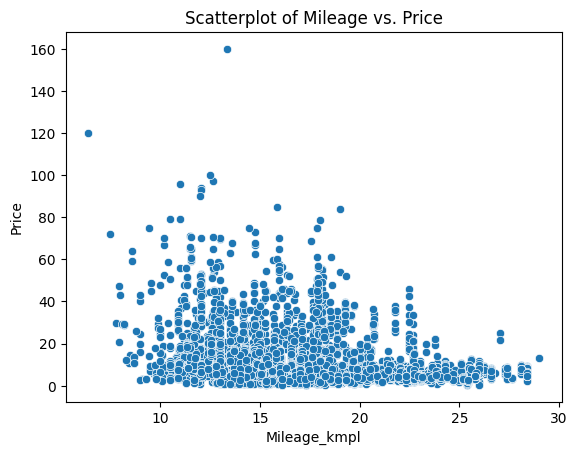

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Mileage
sns.boxplot(x=df['Mileage_kmpl'])
plt.title("Boxplot of Mileage")
plt.show()

# Scatterplot for Price vs. Mileage
sns.scatterplot(x=df['Mileage_kmpl'], y=df['Price'])
plt.title("Scatterplot of Mileage vs. Price")
plt.show()


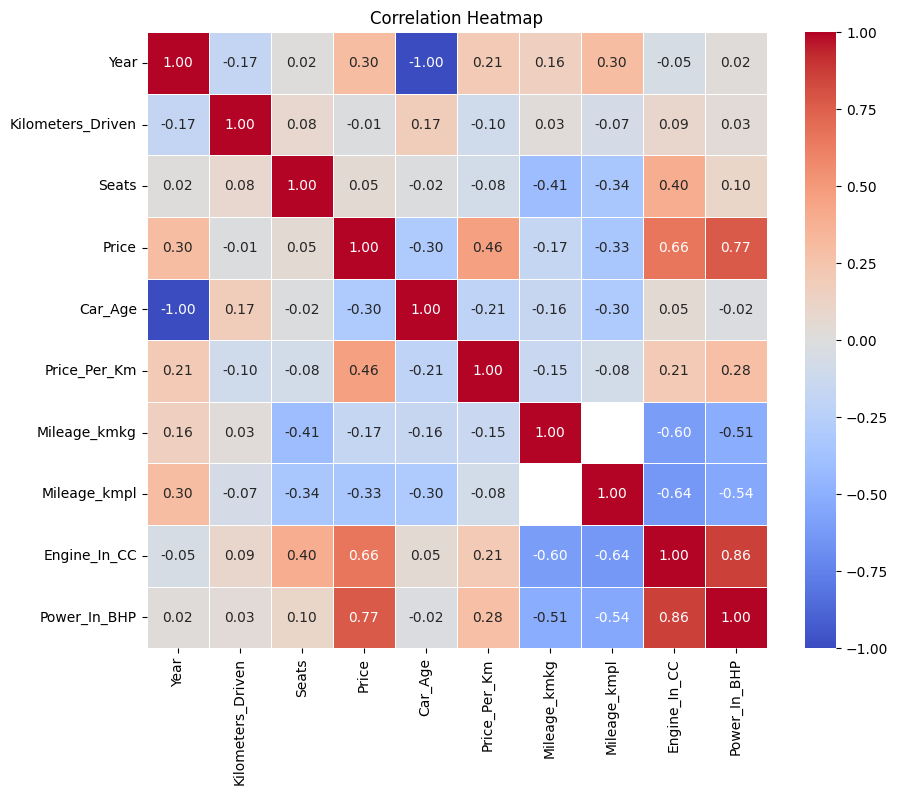

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Assuming your dataset is in a DataFrame called 'cars_data'

# Select numerical columns for correlation
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## Price Distribution with engine and horsepower

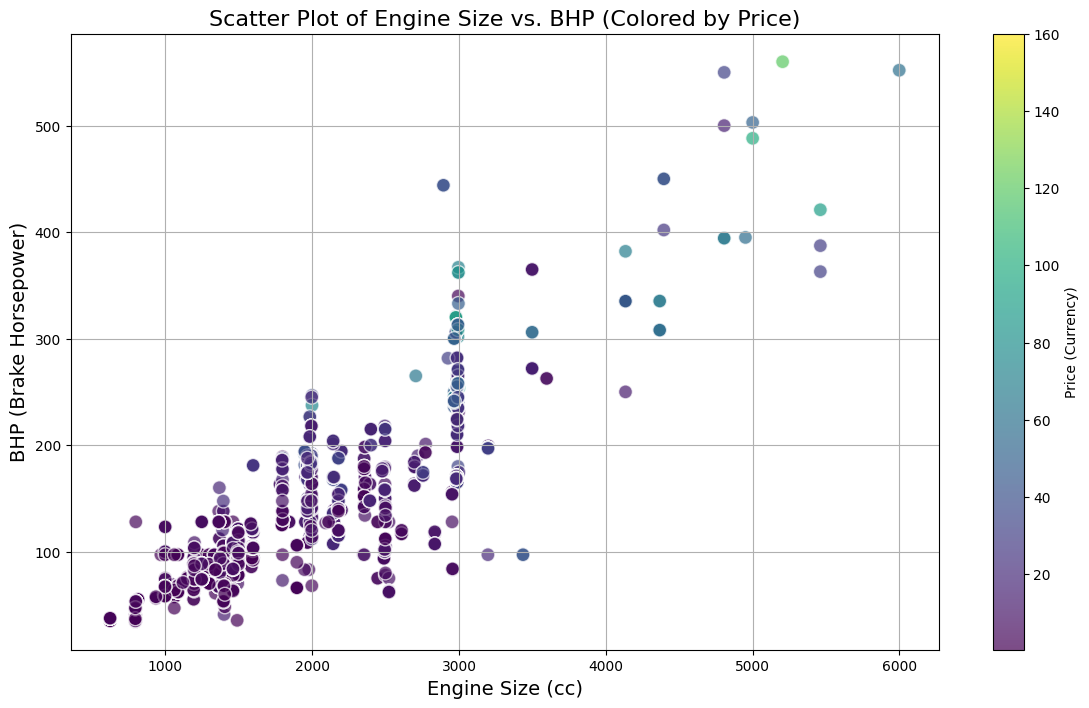

In [42]:
# Step 1: Plot a scatter plot of Engine Size vs. BHP, colored by Price
plt.figure(figsize=(14, 8))

# Create a scatter plot
scatter = plt.scatter(df['Engine_In_CC'], df['Power_In_BHP'], c=df['Price'], cmap='viridis', alpha=0.7, edgecolors='w', s=100)

# Add color bar to show price values
plt.colorbar(scatter, label='Price (Currency)')

# Add labels and title
plt.title('Scatter Plot of Engine Size vs. BHP (Colored by Price)', fontsize=16)
plt.xlabel('Engine Size (cc)', fontsize=14)
plt.ylabel('BHP (Brake Horsepower)', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

C:\Users\Lakshay\AppData\Local\Temp\ipykernel_8852\433773781.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['Engine_Size_Category', 'BHP_Category'])['Price'].mean().unstack()


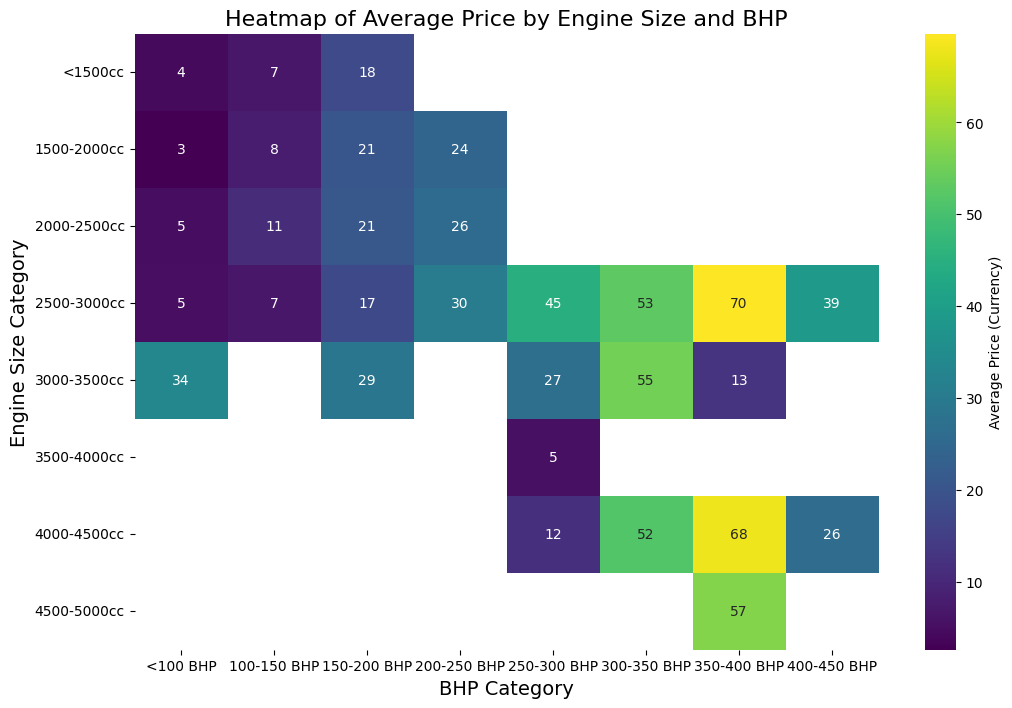

In [69]:
# Create a 2D grid of engine size and BHP categories (you can adjust the bin sizes)
engine_bins = [0, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
bhp_bins = [0, 100, 150, 200, 250, 300, 350, 400, 450]

# Cut Engine Size and BHP into categories
df['Engine_Size_Category'] = pd.cut(df['Engine_In_CC'], bins=engine_bins, labels=['<1500cc', '1500-2000cc', '2000-2500cc', '2500-3000cc', '3000-3500cc', '3500-4000cc', '4000-4500cc', '4500-5000cc'], right=False)
df['BHP_Category'] = pd.cut(df['Power_In_BHP'], bins=bhp_bins, labels=['<100 BHP', '100-150 BHP', '150-200 BHP', '200-250 BHP', '250-300 BHP', '300-350 BHP', '350-400 BHP', '400-450 BHP'], right=False)

# Group by engine size and BHP categories, then calculate average price
heatmap_data = df.groupby(['Engine_Size_Category', 'BHP_Category'])['Price'].mean().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.0f', cbar_kws={'label': 'Average Price (Currency)'})

# Add title and labels
plt.title('Heatmap of Average Price by Engine Size and BHP', fontsize=16)
plt.xlabel('BHP Category', fontsize=14)
plt.ylabel('Engine Size Category', fontsize=14)
plt.show()


In [72]:
def get_price_by_engine_and_power(cc, bhp):
    # Step 1: Filter the dataset based on input engine size (cc) and BHP (bhp)
    filtered_df = df[(df['Engine_In_CC'] >= cc[0]) & (df['Engine_In_CC'] <= cc[1]) & 
                     (df['Power_In_BHP'] >= bhp[0]) & (df['Power_In_BHP'] <= bhp[1])]

    # Step 2: Calculate the average price of all cars in the dataset
    average_price_all = df['Price'].mean()

    # Step 3: Calculate the average price of the filtered cars
    average_price_filtered = filtered_df['Price'].mean()

    # Step 4: Calculate the percentage difference above the average price
    price_increase_percentage = ((average_price_filtered - average_price_all) / average_price_all) * 100

    # Step 5: Print the results
    print(f"Average price of all cars: ${average_price_all:,.0f}")
    print(f"Average price of cars with engine {cc[0]}-{cc[1]}cc and BHP {bhp[0]}-{bhp[1]}: ${average_price_filtered:,.0f}")
    print(f"Price increase for cars with engine {cc[0]}-{cc[1]}cc and BHP {bhp[0]}-{bhp[1]}: {price_increase_percentage:.2f}%\n")


get_price_by_engine_and_power((3000, 4000), (300, 400))
get_price_by_engine_and_power((0, 1500), (100, 150))

Average price of all cars: $9
Average price of cars with engine 3000-4000cc and BHP 300-400: $30
Price increase for cars with engine 3000-4000cc and BHP 300-400: 212.62%

Average price of all cars: $9
Average price of cars with engine 0-1500cc and BHP 100-150: $7
Price increase for cars with engine 0-1500cc and BHP 100-150: -29.66%



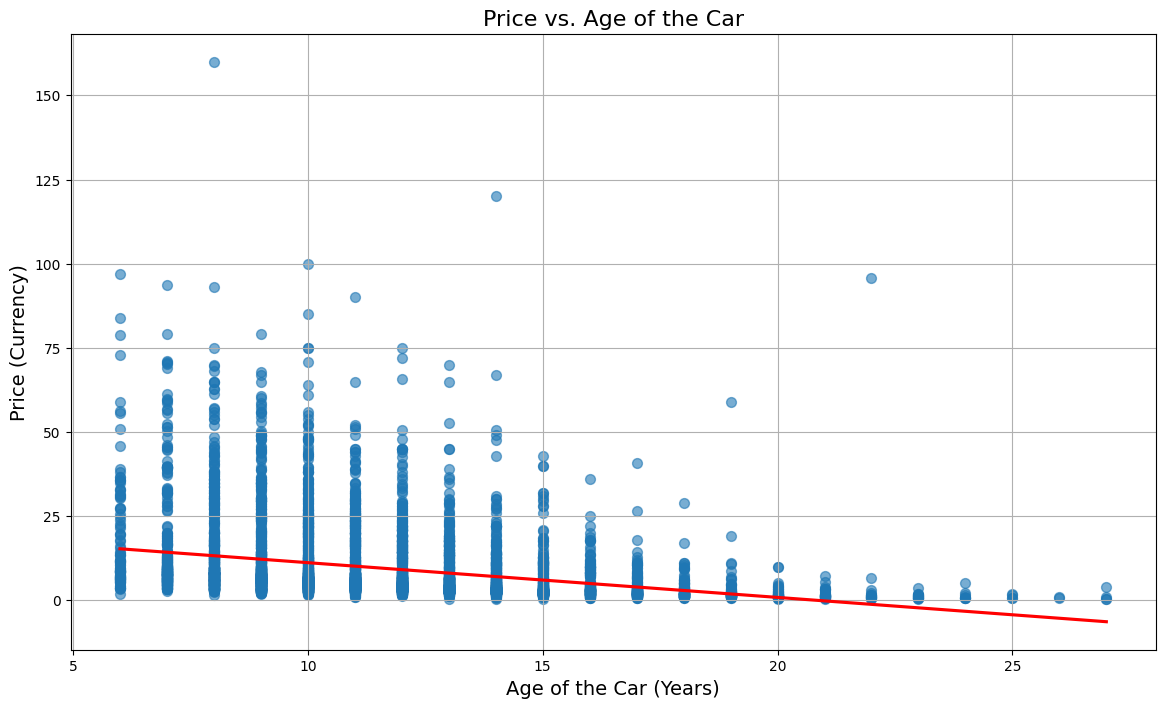

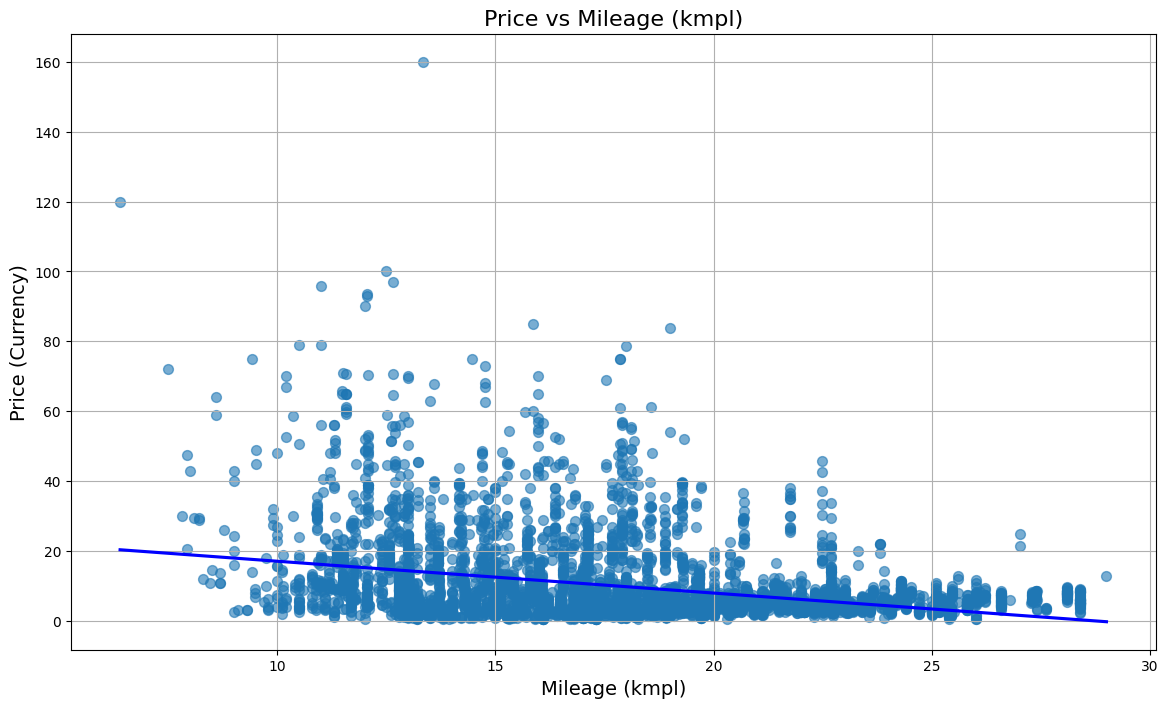

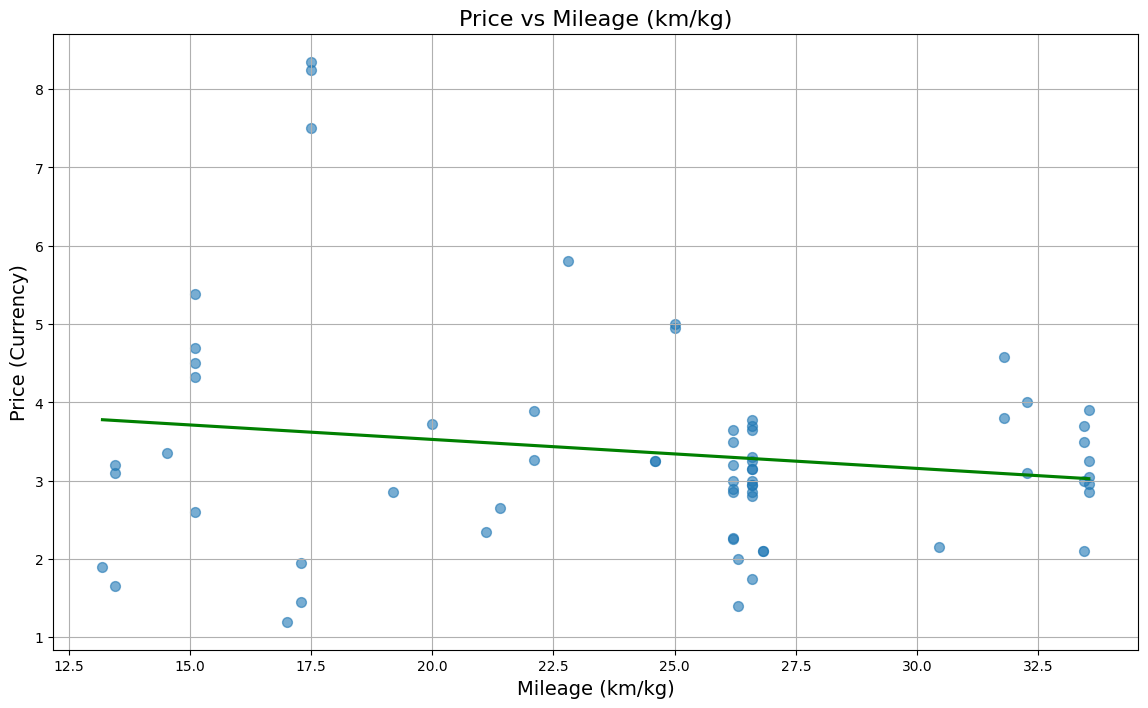

Correlation between Mileage (kmpl) and Price: -0.33
Correlation between Mileage (km/kg) and Price: -0.17
Regression result for Mileage (kmpl) vs Price: y = nanx + nan
R-squared for Mileage (kmpl) vs Price: nan
Regression result for Mileage (km/kg) vs Price: y = nanx + nan
R-squared for Mileage (km/kg) vs Price: nan
Regression result for Age vs Price: y = -1.03x + 21.51
Correlation coefficient for Age vs Price: -0.30


In [82]:

from scipy import stats

# Step 1: Scatter plot for Age vs. Price
plt.figure(figsize=(14, 8))
sns.regplot(x='Car_Age', y='Price', data=df, scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'red'}, ci=None)

# Add title and labels
plt.title('Price vs. Age of the Car', fontsize=16)
plt.xlabel('Age of the Car (Years)', fontsize=14)
plt.ylabel('Price (Currency)', fontsize=14)
plt.grid(True)
plt.show


# Step 1: Scatter plot for Mileage (kmpl) vs Price
plt.figure(figsize=(14, 8))
sns.regplot(x='Mileage_kmpl', y='Price', data=df, scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'blue'}, ci=None)
plt.title('Price vs Mileage (kmpl)', fontsize=16)
plt.xlabel('Mileage (kmpl)', fontsize=14)
plt.ylabel('Price (Currency)', fontsize=14)
plt.grid(True)
plt.show()

# Step 2: Scatter plot for Mileage (km/kg) vs Price
plt.figure(figsize=(14, 8))
sns.regplot(x='Mileage_kmkg', y='Price', data=df, scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'green'}, ci=None)
plt.title('Price vs Mileage (km/kg)', fontsize=16)
plt.xlabel('Mileage (km/kg)', fontsize=14)
plt.ylabel('Price (Currency)', fontsize=14)
plt.grid(True)
plt.show()

# Step 3: Calculate and display the correlation between Mileage and Price

# Correlation between mileage_kmpl and Price
corr_kmpl = df['Mileage_kmpl'].corr(df['Price'])
print(f"Correlation between Mileage (kmpl) and Price: {corr_kmpl:.2f}")

# Correlation between mileage_kmkg and Price
corr_kmkg = df['Mileage_kmkg'].corr(df['Price'])
print(f"Correlation between Mileage (km/kg) and Price: {corr_kmkg:.2f}")

# Step 4: Perform Linear Regression for Mileage (kmpl) vs Price
slope_kmpl, intercept_kmpl, r_value_kmpl, p_value_kmpl, std_err_kmpl = stats.linregress(df['Mileage_kmpl'], df['Price'])
print(f"Regression result for Mileage (kmpl) vs Price: y = {slope_kmpl:.2f}x + {intercept_kmpl:.2f}")
print(f"R-squared for Mileage (kmpl) vs Price: {r_value_kmpl**2:.2f}")

# Step 5: Perform Linear Regression for Mileage (kmkg) vs Price
slope_kmkg, intercept_kmkg, r_value_kmkg, p_value_kmkg, std_err_kmkg = stats.linregress(df['Mileage_kmkg'], df['Price'])
print(f"Regression result for Mileage (km/kg) vs Price: y = {slope_kmkg:.2f}x + {intercept_kmkg:.2f}")
print(f"R-squared for Mileage (km/kg) vs Price: {r_value_kmkg**2:.2f}")

# Step 3: Calculate and display the correlation and regression results for Age vs Price
slope_age, intercept_age, r_value_age, p_value_age, std_err_age = stats.linregress(df['Car_Age'], df['Price'])
print(f"Regression result for Age vs Price: y = {slope_age:.2f}x + {intercept_age:.2f}")
print(f"Correlation coefficient for Age vs Price: {r_value_age:.2f}")

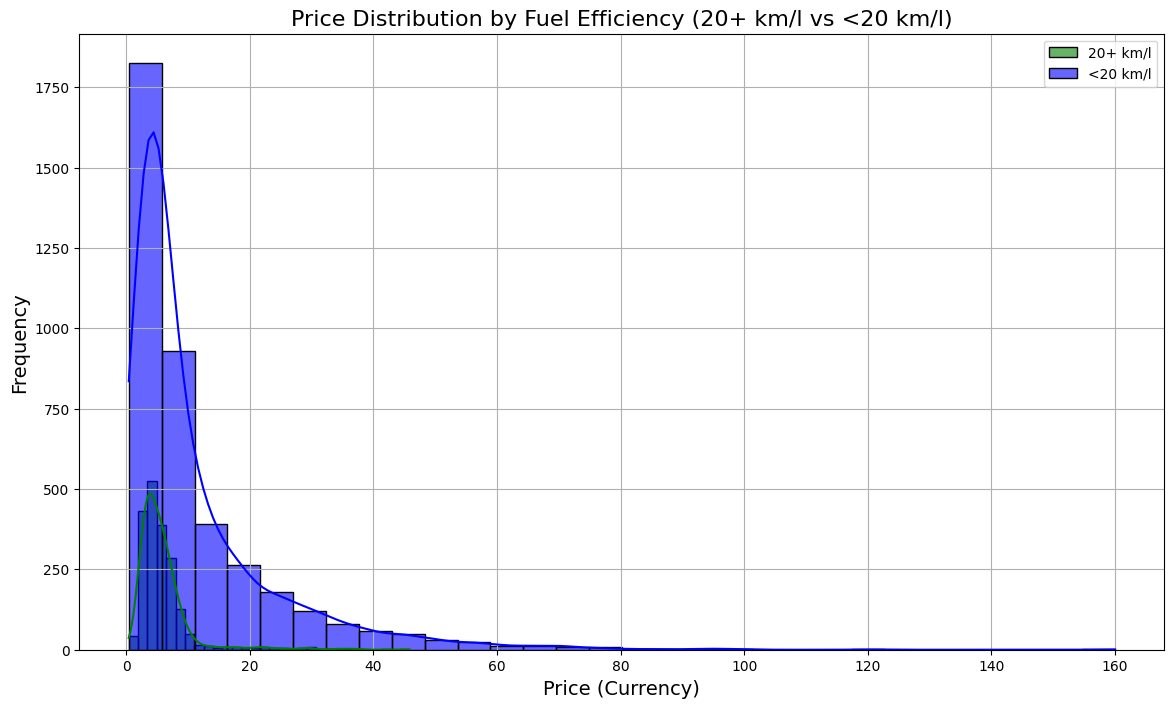

Average price of cars with 20+ km/l mileage: $6
Average price of cars with <20 km/l mileage: $11
Price difference: 93.00% less for more fuel-efficient cars (20+ km/l)


In [91]:
# Step 1: Filter the dataset based on mileage (20+ km/l vs <20 km/l)
efficient_cars = df[df['Mileage_kmpl'] >= 20]  # Cars with mileage 20+ km/l
less_efficient_cars = df[df['Mileage_kmpl'] < 20]  # Cars with mileage <20 km/l

# Step 2: Calculate the average prices for both groups
average_price_efficient = efficient_cars['Price'].mean()
average_price_less_efficient = less_efficient_cars['Price'].mean()

# Step 3: Calculate the percentage difference in prices
price_difference_percentage = ((average_price_less_efficient - average_price_efficient) / average_price_efficient) * 100

# Step 4: Visualize the price distribution for both groups
plt.figure(figsize=(14, 8))

# Plot the price distribution for efficient cars (20+ km/l)
sns.histplot(efficient_cars['Price'], bins=30, kde=True, color='green', label='20+ km/l', alpha=0.6)

# Plot the price distribution for less efficient cars (<20 km/l)
sns.histplot(less_efficient_cars['Price'], bins=30, kde=True, color='blue', label='<20 km/l', alpha=0.6)

# Add title and labels
plt.title('Price Distribution by Fuel Efficiency (20+ km/l vs <20 km/l)', fontsize=16)
plt.xlabel('Price (Currency)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Print the average prices and percentage difference
print(f"Average price of cars with 20+ km/l mileage: ${average_price_efficient:,.0f}")
print(f"Average price of cars with <20 km/l mileage: ${average_price_less_efficient:,.0f}")
print(f"Price difference: {price_difference_percentage:.2f}% less for more fuel-efficient cars (20+ km/l)")

In [99]:
def add_labels_to_bars(ax, fontsize=12):
    """
    Add labels on top of the bars in a bar chart.

    Parameters:
    - ax: matplotlib Axes object, the bar chart to annotate.
    - fontsize: int, the font size of the labels (default is 12).
    """
    for bar in ax.patches:  # Iterate through all the bars in the Axes
        height = bar.get_height()  # Get the height of each bar
        ax.annotate(f'{height}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Coordinates for the label
                    xytext=(0, 5),  # Offset to avoid overlapping with the bar
                    textcoords="offset points",
                    ha='center', 
                    va='bottom', 
                    fontsize=fontsize)

### Car Brands and Price

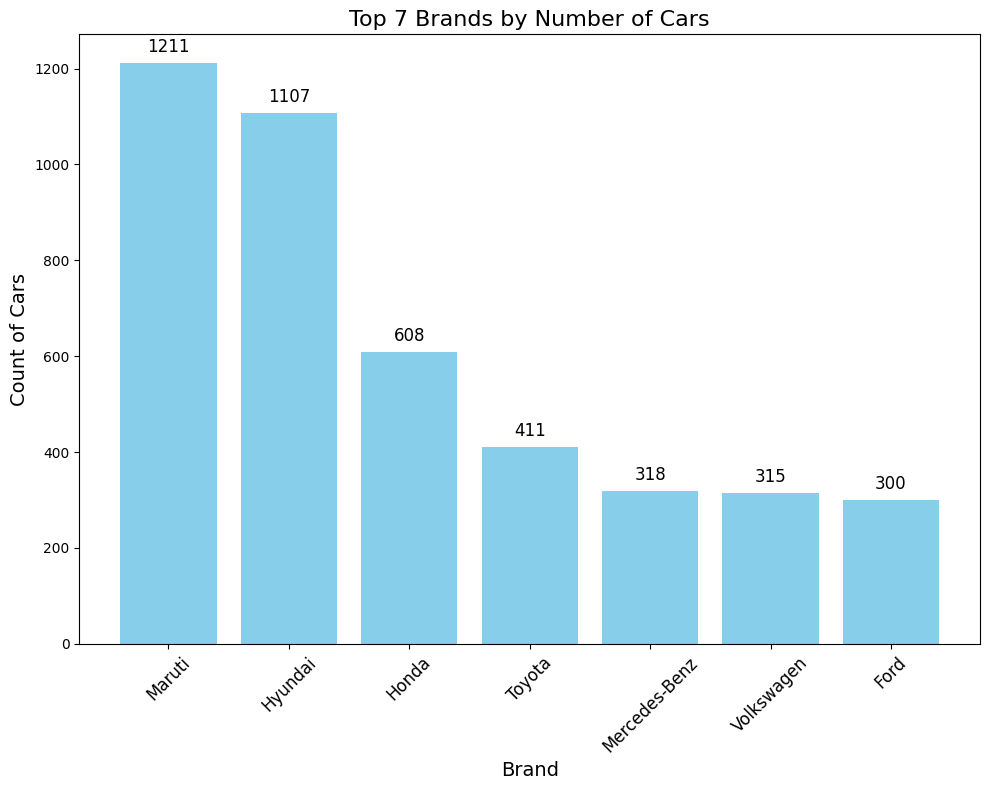

In [132]:
import matplotlib.pyplot as plt

# Create the pivot table
d = df.pivot_table(index="Brand", values="Car_ID", aggfunc="count")

# Reset the index to make 'Brand' a column and sort by 'Car_ID'
# d = d.reset_index().sort_values(by="Car_ID", ascending=False)

# Select the top 7 brands
# d_top7 = d.head(7)

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 8))  # Use plt.subplots to get the figure and axes
ax.bar(d_top7["Brand"], d_top7["Car_ID"], color='skyblue')
# plt.ylim(250,1500)
# Add labels to bars
def add_labels_to_bars(ax, fontsize=12):
    """
    Add labels on top of the bars in a bar chart.

    Parameters:
    - ax: matplotlib Axes object, the bar chart to annotate.
    - fontsize: int, the font size of the labels (default is 12).
    """
    for bar in ax.patches:  # Iterate through all the bars in the Axes
        height = bar.get_height()  # Get the height of each bar
        ax.annotate(f'{height}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Coordinates for the label
                    xytext=(0, 5),  # Offset to avoid overlapping with the bar
                    textcoords="offset points",
                    ha='center', 
                    va='bottom', 
                    fontsize=fontsize)

add_labels_to_bars(ax)

# Add chart title and labels
ax.set_title("Top 7 Brands by Number of Cars", fontsize=16)
ax.set_xlabel("Brand", fontsize=14)
ax.set_ylabel("Count of Cars", fontsize=14)
ax.tick_params(axis='x', rotation=45, labelsize=12)

# Adjust layout and show the plot
fig.tight_layout()
plt.savefig("")
plt.show()


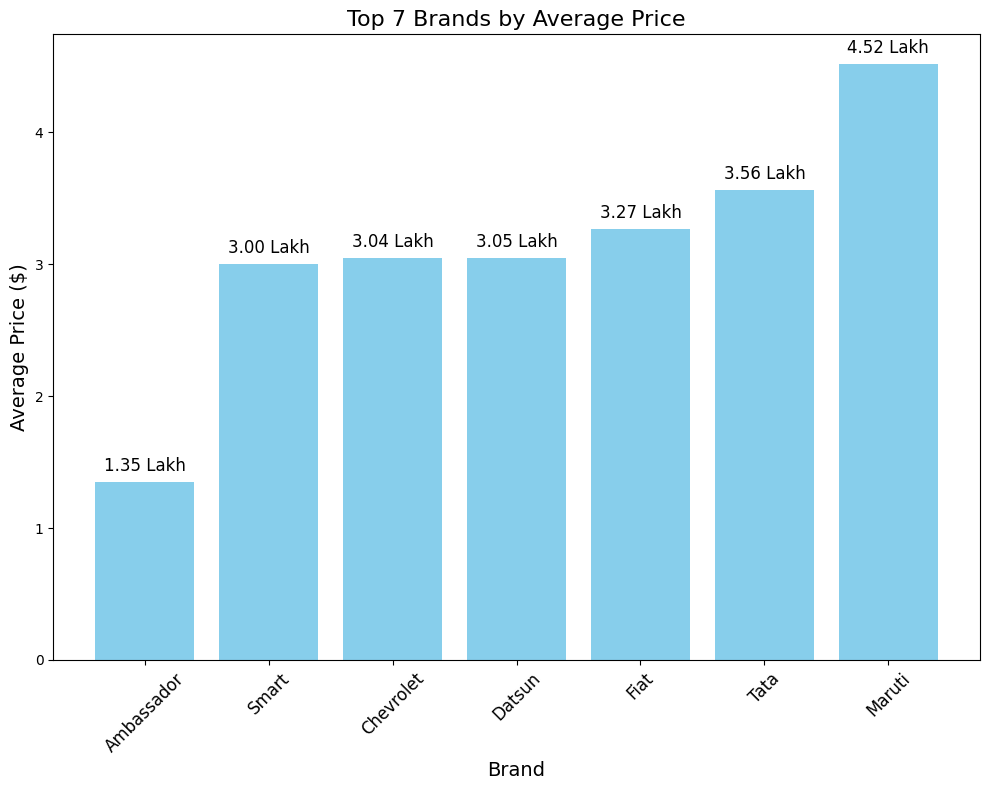

In [145]:
import matplotlib.pyplot as plt

# Create the pivot table
d = df.pivot_table(index="Brand", values="Price", aggfunc="mean")

# Reset the index to make 'Brand' a column and sort by 'Price'
d = d.reset_index().sort_values(by="Price", ascending=True)

# Select the top 7 brands
d_top7 = d.head(7)

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 8))  # Use plt.subplots to get the figure and axes
bars = ax.bar(d_top7["Brand"], d_top7["Price"], color='skyblue')

# Optional: Adjust y-axis limits for better visualization
# Remove or customize if needed
# plt.ylim(0, d_top7["Price"].max() + 100)

# Add labels to bars
def add_labels_to_bars(ax, fontsize=12):
    """
    Add labels on top of the bars in a bar chart.

    Parameters:
    - ax: matplotlib Axes object, the bar chart to annotate.
    - fontsize: int, the font size of the labels (default is 12).
    """
    for bar in ax.patches:  # Iterate through all the bars in the Axes
        height = bar.get_height()  # Get the height of each bar
        ax.annotate(f'{height:.2f} Lakh',  # Format height as monetary value
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Coordinates for the label
                    xytext=(0, 5),  # Offset to avoid overlapping with the bar
                    textcoords="offset points",
                    ha='center', 
                    va='bottom', 
                    fontsize=fontsize)

add_labels_to_bars(ax)

# Add chart title and labels
ax.set_title("Top 7 Brands by Average Price", fontsize=16)  # Corrected title
ax.set_xlabel("Brand", fontsize=14)
ax.set_ylabel("Average Price ($)", fontsize=14)  # Corrected y-axis label
ax.tick_params(axis='x', rotation=45, labelsize=12)

# Adjust layout and show the plot
fig.tight_layout()
plt.savefig("assets/avg_price.png")
plt.show()


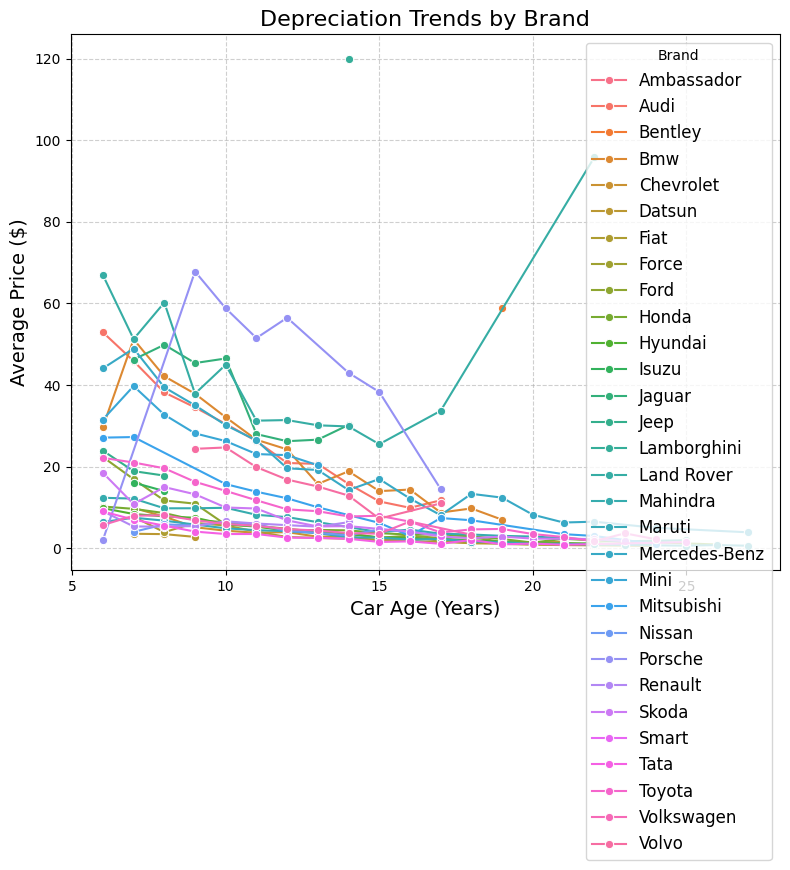

C:\Users\Lakshay\AppData\Local\Temp\ipykernel_8852\2919042281.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_value_per_brand.values, y=avg_value_per_brand.index, palette='viridis')


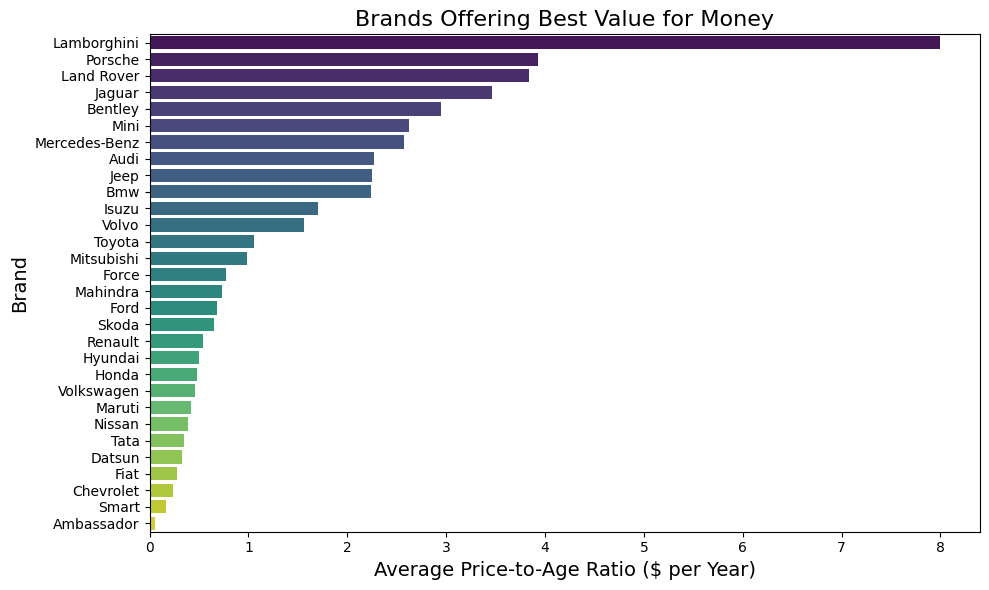

In [143]:
avg_price_by_age = df.groupby(['Brand', 'Car_Age'])['Price'].mean().reset_index()

# Depreciation Trends by Brand
plt.figure(figsize=(8, 8))
sns.lineplot(data=avg_price_by_age, x='Car_Age', y='Price', hue='Brand', marker='o')
plt.title('Depreciation Trends by Brand', fontsize=16)
plt.xlabel('Car Age (Years)', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.legend(title='Brand', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('assets/age_brand_dep.png')
plt.show()

# Identify Value-for-Money Brands
# Compute price-to-age ratio
df['Price_to_Age'] = df['Price'] / (df['Car_Age'] + 1)  # Adding 1 to avoid division by zero
avg_value_per_brand = df.groupby('Brand')['Price_to_Age'].mean().sort_values(ascending=False)

# Bar chart for value-for-money brands
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_value_per_brand.values, y=avg_value_per_brand.index, palette='viridis')
plt.title('Brands Offering Best Value for Money', fontsize=16)
plt.xlabel('Average Price-to-Age Ratio ($ per Year)', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.tight_layout()

plt.show()

### Fuel

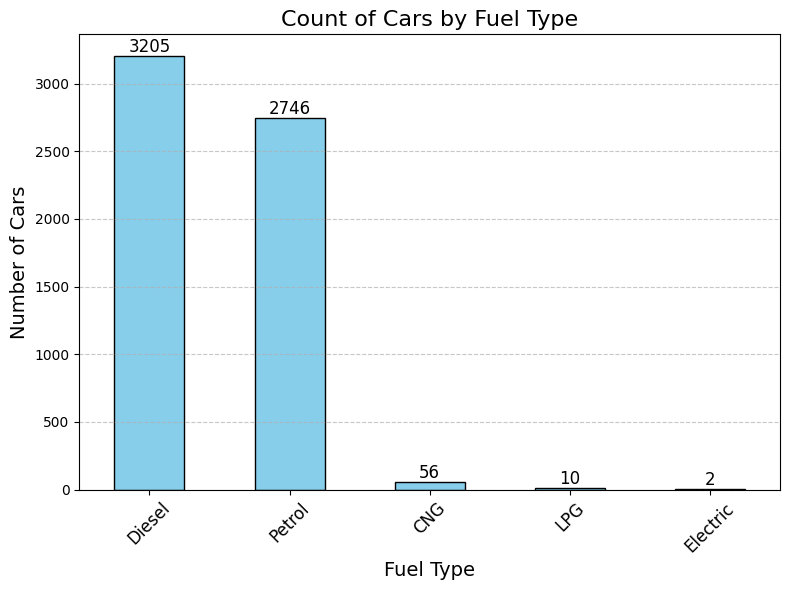

In [148]:
def add_labels_on_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), 
                 ha='center', va='bottom', fontsize=12, color='black')

# Count of cars by fuel type
fuel_counts = df['Fuel_Type'].value_counts()

# Create bar chart
plt.figure(figsize=(8, 6))
bars = fuel_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels on top of bars
add_labels_on_bars(bars.patches)

plt.title('Count of Cars by Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


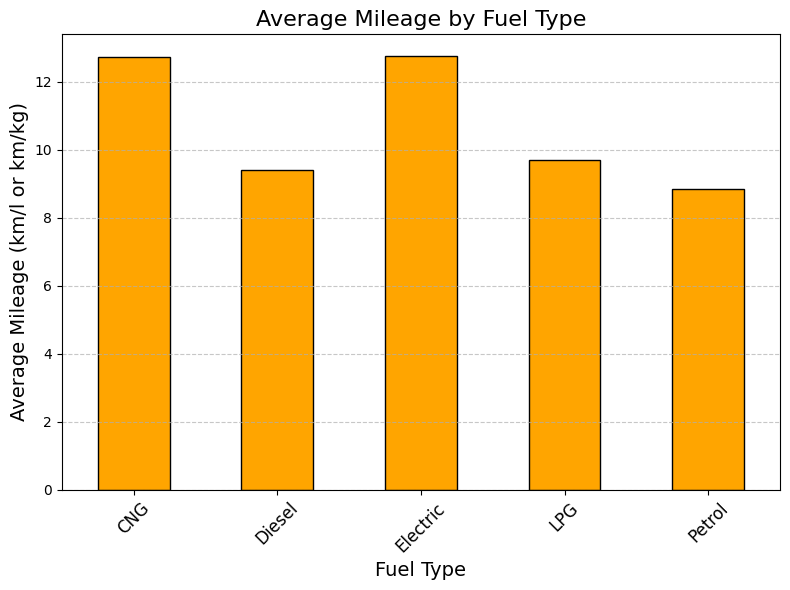

In [149]:
# Replace NaNs with 0 for simplicity, or handle as needed
df['Mileage_kmpl'] = df['Mileage_kmpl'].fillna(0)
df['Mileage_kmkg'] = df['Mileage_kmkg'].fillna(0)

# Calculate average mileage for each fuel type
df['Average_Mileage'] = df[['Mileage_kmpl', 'Mileage_kmkg']].mean(axis=1)
avg_mileage = df.groupby('Fuel_Type')['Average_Mileage'].mean()

# Create bar chart for average mileage
plt.figure(figsize=(8, 6))
avg_mileage.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Mileage by Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Average Mileage (km/l or km/kg)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


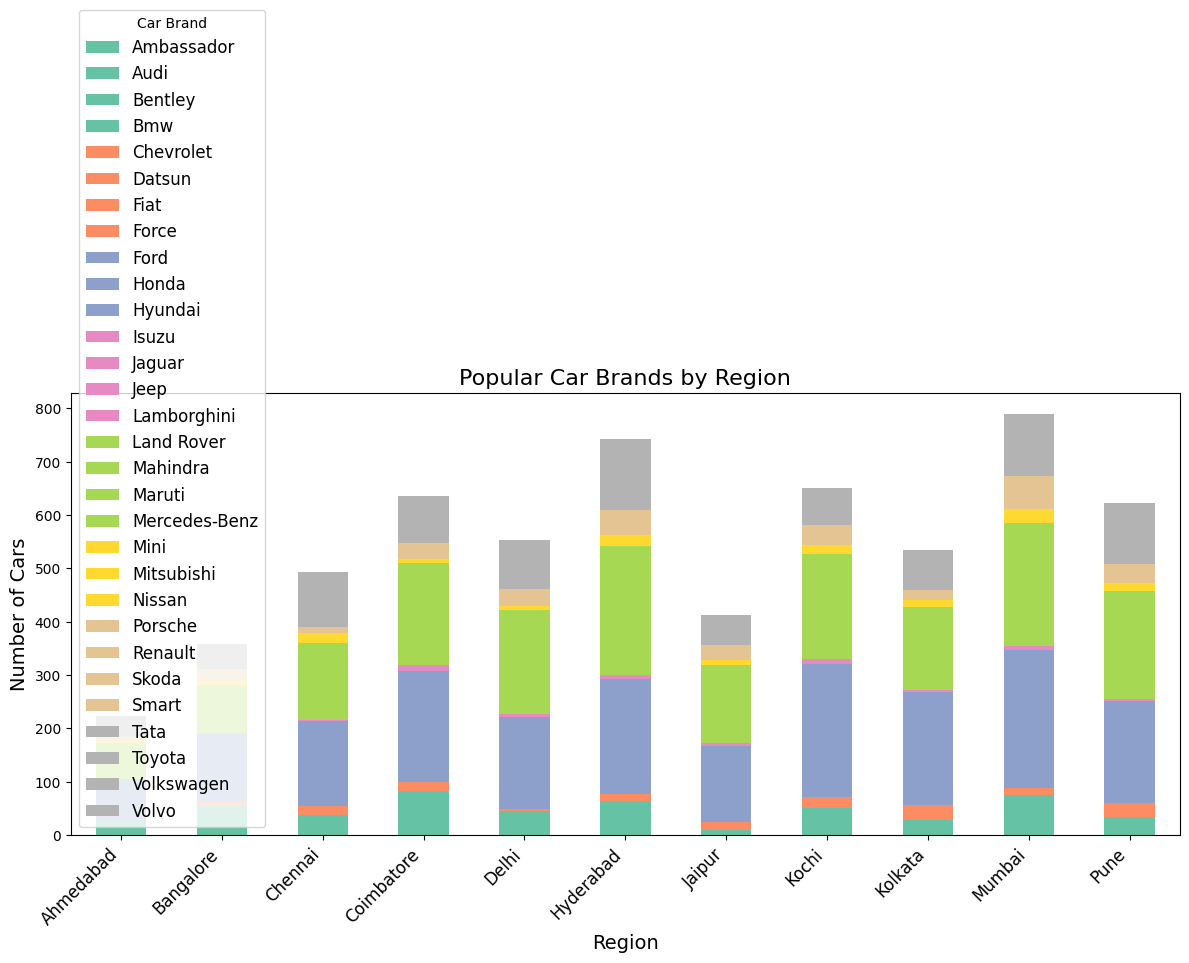

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' contains 'Region' and 'Car_Brand' or 'Car_Model'
# Example: Popular car brands by region
brand_region_counts = df.groupby(['Location', 'Brand']).size().unstack().fillna(0)

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plot stacked bars
brand_region_counts.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')

# Customize chart
ax.set_title('Popular Car Brands by Region', fontsize=16)
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel('Number of Cars', fontsize=14)
ax.legend(title='Car Brand', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


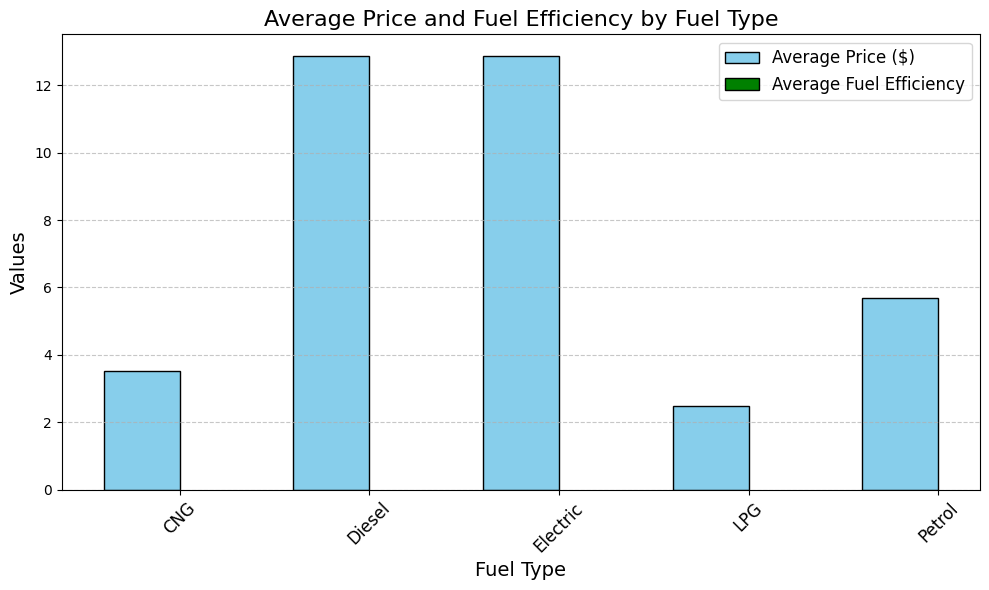

In [151]:
import matplotlib.pyplot as plt

# Assuming 'Fuel_Efficiency' has categorical values such as "Low", "Medium", "High"
fuel_efficiency_map = {'Low': 1, 'Medium': 2, 'High': 3}

# Convert categorical fuel efficiency to numerical values
df['Fuel_Efficiency_Numeric'] = df['Fuel_Efficiency'].map(fuel_efficiency_map)

# Group data by Fuel_Type and calculate the mean for Price and Fuel_Efficiency
fuel_stats = df.groupby('Fuel_Type')[['Price', 'Fuel_Efficiency_Numeric']].mean()

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.4  # Bar width
x = range(len(fuel_stats))

# Plot average price
ax.bar(x, fuel_stats['Price'], width, label='Average Price ($)', color='skyblue', edgecolor='black')

# Plot average fuel efficiency (after converting to numeric)
ax.bar([p + width for p in x], fuel_stats['Fuel_Efficiency_Numeric'], width, label='Average Fuel Efficiency', color='green', edgecolor='black')

# Add labels, legend, and titles
ax.set_title('Average Price and Fuel Efficiency by Fuel Type', fontsize=16)
ax.set_xlabel('Fuel Type', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels(fuel_stats.index, rotation=45, fontsize=12)
ax.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
